<a href="https://colab.research.google.com/github/faiz-aljohani/Arabic-App-Review-Classification/blob/main/faiz_ICS472_NLP_Arabic_App_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Arabic-App-Review-Classification'...
fatal: could not read Username for 'https://github.com': No such device or address


# Part-B [65 points]:
 Multiclass and Multilabel App Review Classification

## Setup & Load Dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
dataset = pd.read_csv("https://raw.githubusercontent.com/faiz-aljohani/Arabic-App-Review-Classification/main/AppReview-Multilabel.csv")

In [29]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1:]

## Split the dataset train/val/test...
70-30 Train TestVal. Take 50% of TestVal data as validation set.
Use seed 777 for partitioning.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.3, random_state=777)
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=777)

## Dataset analysis and report on important statistics.


In [32]:
dataset.head()

,review,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,High,Medium,Low,No
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,No,Medium,Medium,Low
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,No,High,Low,No
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,No,No,High,No
4,تبين م لي ي تم ل يب,No,No,Low,High


In [33]:
display(dataset['bug_report'].value_counts())
display(dataset['improvement_request'].value_counts())
display(dataset['rating'].value_counts())
display(dataset['others'].value_counts())

bug_report
No        1736
High       542
Medium     374
Low        248
Name: count, dtype: int64

improvement_request
No        1797
Medium     415
Low        395
High       293
Name: count, dtype: int64

rating
High      988
No        929
Medium    707
Low       276
Name: count, dtype: int64

others
No        2080
Medium     330
Low        260
High       230
Name: count, dtype: int64

In [37]:
# RUN ONCE!
def binary_label(label):
    if label in ['High','Medium','Low']:
        return 1
    else:
        return 0

def pie_plot(column):
    # plt.figure(figsize=(10,10))
    # plt.subplot(2,2,1)
    plt.title(column)
    plt.pie(dataset[column].value_counts(), labels=dataset[column].unique().tolist(), autopct='%1.1f%%')
    plt.show()




In [ ]:
dataset['bug_report'] = dataset['bug_report'].apply(binary_label)
dataset['improvement_request'] = dataset['improvement_request'].apply(binary_label)
dataset['rating'] = dataset['rating'].apply(binary_label)
dataset['others'] = dataset['others'].apply(binary_label)

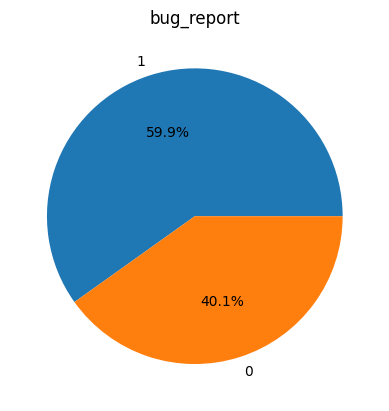

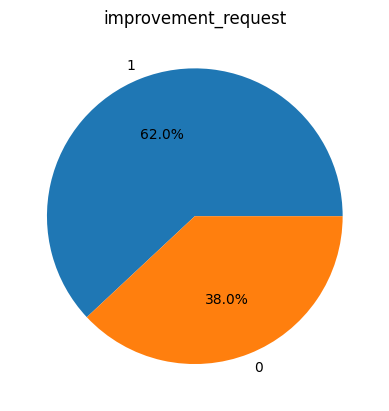

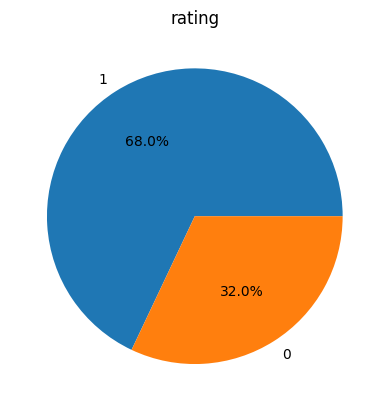

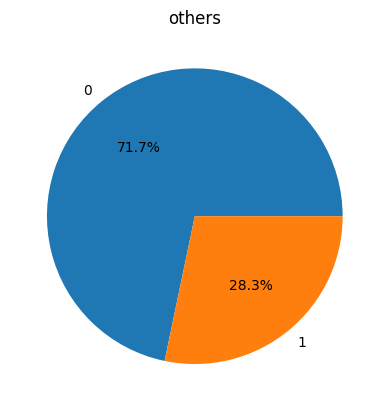

In [38]:
pie_plot('bug_report')
pie_plot('improvement_request')
pie_plot('rating')
pie_plot('others')

1. character count
2. word count
3. max sentence's character and word count
4. mean word length
5. mean sentence length

In [41]:
dataset['char_count'] = dataset['review'].str.len()
dataset['word_count'] = dataset['review'].str.split().str.len()
display(dataset.head())

,review,bug_report,improvement_request,rating,others,char_count,word_count
0,يبيله تصليحات كثير,1,1,1,0,18,3
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,0,1,1,1,33,6
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,0,1,1,0,76,13
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,0,0,1,0,45,8
4,تبين م لي ي تم ل يب,0,0,1,1,19,7


In [54]:
sortedDataset = dataset.sort_values('char_count', ascending=False)

sortedDataset.head()

,review,bug_report,improvement_request,rating,others,char_count,word_count
902,من فضلك أعد المحاولة\nمن فضلك أعد المحاولة\nمن...,0,0,0,1,3023,576
87,أكثر من مليار تحميل.... لكن فيه عيوب العيب الأ...,1,1,1,0,500,89
369,العبة جميلة جدا جدا جداجدا جديد جدا حمام الدار...,0,0,1,1,500,100
170,غير متقولوش لعائشة اذا كان علابالي راح نبعتلكم...,0,0,0,1,500,100
1562,جميل جداً ورائع لكن احس في بعض العيوب الليالي ...,1,1,1,1,499,93


In [60]:
dataset['mean_word_length'] = dataset['review'].map(lambda r: np.mean([len(word) for word in r.split()]))

dataset['mean_sent_length'] = dataset['review'].map(lambda r: np.mean([len(sent) for sent in tokenize.sent_tokenize(r)]))
dataset.head()

,review,bug_report,improvement_request,rating,others,char_count,word_count,mean_word_length,mean_sent_length
0,يبيله تصليحات كثير,1,1,1,0,18,3,5.333333,18.0
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,0,1,1,1,33,6,4.666667,33.0
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,0,1,1,0,76,13,4.923077,76.0
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,0,0,1,0,45,8,4.750000,45.0
4,تبين م لي ي تم ل يب,0,0,1,1,19,7,1.857143,19.0


## Model Training

## Proper hyper-parameter tuning based on the validation set

## Classification analysis and possible improvements.


## Final results on the test set.